In [44]:
import numpy as np
import pandas as pd


In [3]:
from sklearn.linear_model import Ridge

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [5]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, GridSearchCV

In [6]:
from sklearn.pipeline import Pipeline

In [7]:
from sklearn.compose import TransformedTargetRegressor

In [8]:
from sklearn import preprocessing

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
import joblib

In [11]:
import matplotlib as plt

In [12]:
import seaborn as sns

In [13]:
from google.colab import files

uploaded = files.upload()

# Luego, selecciona el archivo utilizando el botón de carga y luego ejecuta:

import pandas as pd

df_casas = pd.read_csv(next(iter(uploaded.keys())))


Saving realestate.csv to realestate.csv


In [14]:
df_casas.head()

,No,TransactionDate,HouseAge,DistanceToMRT,NumberConvenienceStores,Latitude,Longitude,PriceOfUnitArea
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


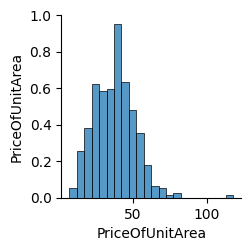

In [15]:
sns.pairplot(df_casas[["PriceOfUnitArea"]])

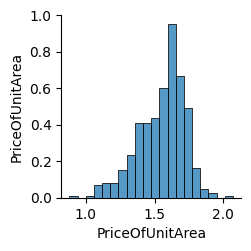

In [16]:
sns.pairplot(np.log10(df_casas[["PriceOfUnitArea"]]))

In [17]:
df_casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   No                       414 non-null    int64  
 1   TransactionDate          414 non-null    float64
 2   HouseAge                 414 non-null    float64
 3   DistanceToMRT            414 non-null    float64
 4   NumberConvenienceStores  414 non-null    int64  
 5   Latitude                 414 non-null    float64
 6   Longitude                414 non-null    float64
 7   PriceOfUnitArea          414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [18]:
# Convertir la columna "TransactionDate" a tipo de dato fecha
df_casas['TransactionDate'] = pd.to_datetime(df_casas['TransactionDate'])

# Extraer características numéricas de la fecha
df_casas['Year'] = df_casas['TransactionDate'].dt.year
df_casas['Month'] = df_casas['TransactionDate'].dt.month
df_casas['DayOfWeek'] = df_casas['TransactionDate'].dt.dayofweek

# Eliminar la columna original "TransactionDate" si ya no es necesaria
df_casas = df_casas.drop('TransactionDate', axis=1)

In [19]:
# defino los limites
bins = [0, 500, 1454, float('inf')]
labels = ['Cercano', 'Medio', 'Lejano']

# convierto a categorica
df_casas['DistanceToMRT_Category'] = pd.cut(df_casas['DistanceToMRT'], bins=bins, labels=labels)

print(df_casas)

      No  HouseAge  DistanceToMRT  NumberConvenienceStores  Latitude  \
0      1      32.0       84.87882                       10  24.98298   
1      2      19.5      306.59470                        9  24.98034   
2      3      13.3      561.98450                        5  24.98746   
3      4      13.3      561.98450                        5  24.98746   
4      5       5.0      390.56840                        5  24.97937   
..   ...       ...            ...                      ...       ...   
409  410      13.7     4082.01500                        0  24.94155   
410  411       5.6       90.45606                        9  24.97433   
411  412      18.8      390.96960                        7  24.97923   
412  413       8.1      104.81010                        5  24.96674   
413  414       6.5       90.45606                        9  24.97433   

     Longitude  PriceOfUnitArea  Year  Month  DayOfWeek DistanceToMRT_Category  
0    121.54024             37.9  1970      1          

In [20]:
x,y = df_casas.drop(["PriceOfUnitArea", "No"], axis =1), df_casas["PriceOfUnitArea"]

In [21]:
df_casas.head()

,No,HouseAge,DistanceToMRT,NumberConvenienceStores,Latitude,Longitude,PriceOfUnitArea,Year,Month,DayOfWeek,DistanceToMRT_Category
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,1970,1,3,Cercano
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,1970,1,3,Cercano
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,1970,1,3,Medio
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,1970,1,3,Medio
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,1970,1,3,Cercano


In [22]:
summary_stats = df_casas['DistanceToMRT'].describe()
print(summary_stats)

count     414.000000
mean     1083.885689
std      1262.109595
min        23.382840
25%       289.324800
50%       492.231300
75%      1454.279000
max      6488.021000
Name: DistanceToMRT, dtype: float64


In [23]:
df_casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   No                       414 non-null    int64   
 1   HouseAge                 414 non-null    float64 
 2   DistanceToMRT            414 non-null    float64 
 3   NumberConvenienceStores  414 non-null    int64   
 4   Latitude                 414 non-null    float64 
 5   Longitude                414 non-null    float64 
 6   PriceOfUnitArea          414 non-null    float64 
 7   Year                     414 non-null    int64   
 8   Month                    414 non-null    int64   
 9   DayOfWeek                414 non-null    int64   
 10  DistanceToMRT_Category   414 non-null    category
dtypes: category(1), float64(5), int64(5)
memory usage: 33.0 KB


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [25]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["DistanceToMRT_Category"]
numerical_columns = ["HouseAge", "NumberConvenienceStores", "Latitude", "Longitude", "Year"]

preprocessor = make_column_transformer((OneHotEncoder(drop="if_binary"), categorical_columns),
                                       remainder="passthrough",
                                       verbose_feature_names_out=False,)





In [28]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import numpy as np
import scipy as sp


model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10),
        func=np.log10,
        inverse_func=sp.special.exp10
    ),
)

In [29]:
X_train

,HouseAge,DistanceToMRT,NumberConvenienceStores,Latitude,Longitude,Year,Month,DayOfWeek,DistanceToMRT_Category
326,4.1,56.47425,7,24.95744,121.53711,1970,1,3,Cercano
410,5.6,90.45606,9,24.97433,121.54310,1970,1,3,Cercano
391,6.2,1939.74900,1,24.95155,121.55387,1970,1,3,Lejano
352,18.4,2674.96100,3,24.96143,121.50827,1970,1,3,Lejano
132,26.6,482.75810,5,24.97433,121.53863,1970,1,3,Cercano
...,...,...,...,...,...,...,...,...,...
71,35.5,640.73910,3,24.97563,121.53715,1970,1,3,Medio
106,17.2,189.51810,8,24.97707,121.54308,1970,1,3,Cercano
270,10.8,252.58220,1,24.97460,121.53046,1970,1,3,Cercano
348,4.6,259.66070,6,24.97585,121.54516,1970,1,3,Cercano


In [30]:
y_train


326     62.1
410     50.0
391     31.3
352     25.7
132     37.5
       ...  
71      40.8
106     47.1
270    117.5
348     53.7
102     54.4
Name: PriceOfUnitArea, Length: 310, dtype: float64

In [31]:
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.11101e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['DistanceToMRT_Category'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

In [32]:
from sklearn.metrics import median_absolute_error

y_pred = model.predict(X_train)

mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae: 2f} usd"
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAR on testing set: {mae: 2f} usd"

In [33]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'verdad')

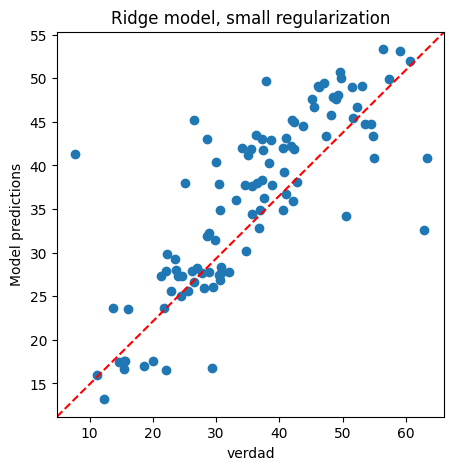

In [34]:
fig, ax = plt.subplots (figsize = (5,5))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.title("Ridge model, small regularization")
plt.ylabel("Model predictions")
plt.xlabel("verdad")

In [35]:
feature_names = model[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names
)

coefs

,Coefficients
DistanceToMRT_Category_Cercano,0.057138
DistanceToMRT_Category_Lejano,-0.042657
DistanceToMRT_Category_Medio,-0.014472
HouseAge,-0.002721
DistanceToMRT,-0.000036
NumberConvenienceStores,0.007972
Latitude,3.899757
Longitude,0.405133
Year,0.000000
Month,0.000000


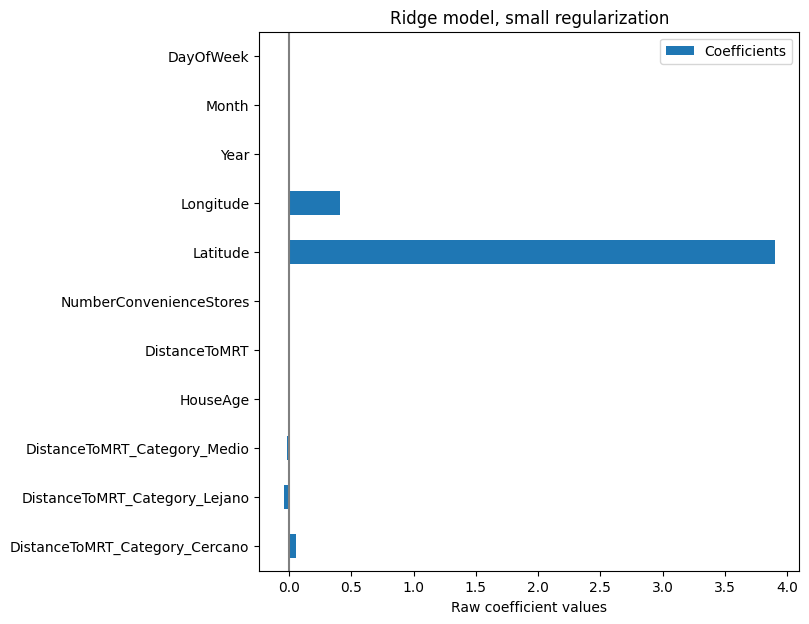

In [36]:
coefs.plot.barh(figsize=(9,7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

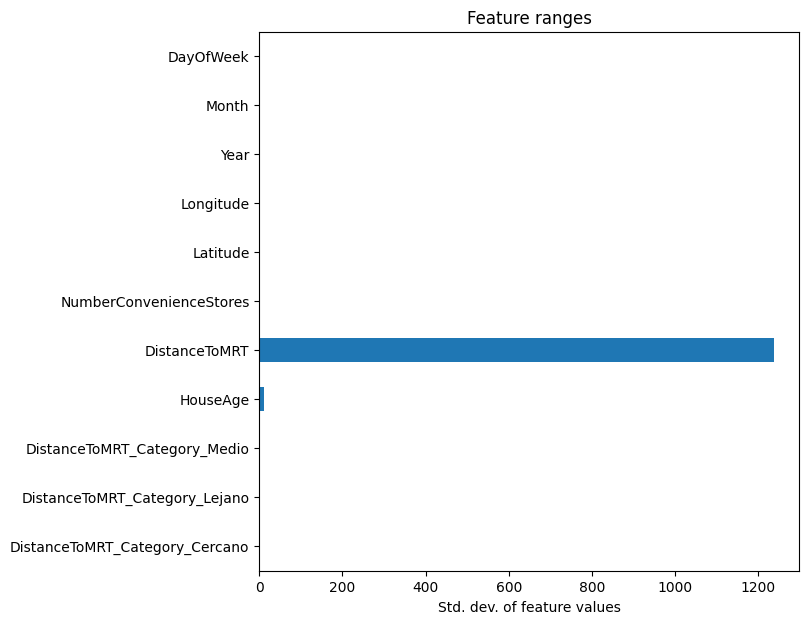

In [37]:
X_train_preprocessed = pd.DataFrame(
    model[:-1].transform(X_train), columns=feature_names
)

X_train_preprocessed.std(axis=0).plot.barh(figsize=(9,7))
plt.title("Feature ranges")
plt.xlabel("Std. dev. of feature values")
plt.subplots_adjust(left=0.3)

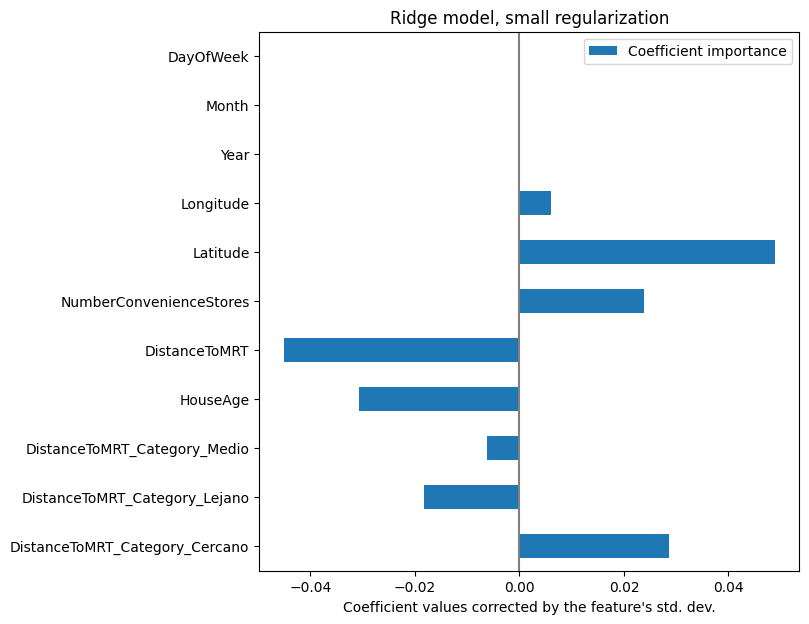

In [38]:
coefs = pd.DataFrame(
    model[-1].regressor_.coef_ * X_train_preprocessed.std(axis=0),
    columns=["Coefficient importance"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9,7))
plt.xlabel("Coefficient values corrected by the feature's std. dev.")
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [39]:
from sklearn.model_selection import RepeatedKFold, cross_validate


In [40]:
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_model = cross_validate(
    model,
    x,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [
        est[-1].regressor_.coef_
        for est, (train_idx, _) in zip(cv_model["estimator"], cv.split(x, y))
    ],
    columns=feature_names,
)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


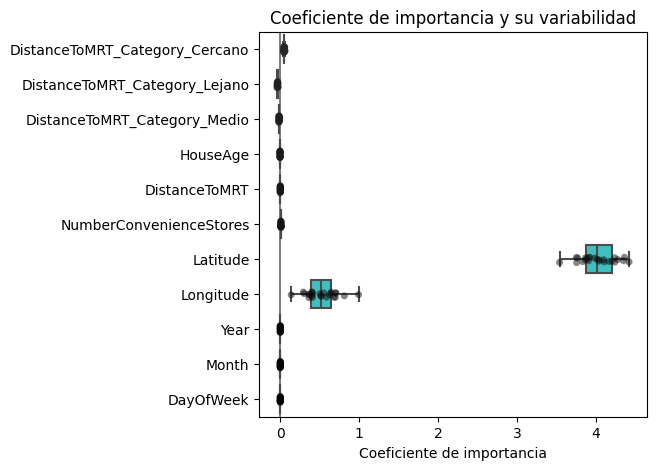

In [41]:
plt.figure(figsize=(5, 5))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
plt.axvline(x=0, color="0.5")
plt.title("Coeficiente de importancia y su variabilidad")
plt.xlabel("Coeficiente de importancia")
plt.show()


Este resultado puede interpretarse como que la ubicación geográfica (representada por la latitud y longitud) tiene un impacto significativo en el precio de la unidad de área. Es posible que las propiedades ubicadas en ciertas áreas geográficas tengan valores de precios más altos debido a factores como la accesibilidad, servicios cercanos, entorno, entre otros.

In [42]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-10, 10 , 21)
model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=RidgeCV(alphas=alphas),
        func=np.log10,
        inverse_func=sp.special.exp10,
    ),
)
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['DistanceToMRT_Category'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=RidgeCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]))))])

In [43]:
model[-1].regressor_.alpha_

0.001

In [45]:
y_pred = model.predict(X_train)
mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE: {mae:.2f}"
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test,y_pred)
string_score = f"MAE: {mae:.2f}"

Text(0.5, 0, 'Truths')

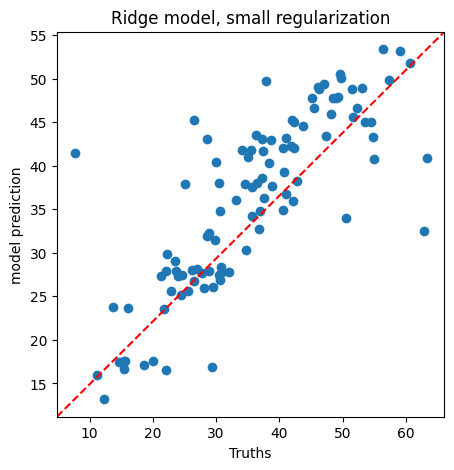

In [46]:
fig, ax = plt.subplots(figsize=(5, 5))  # Reducir el tamaño de la figura
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.title("Ridge model, small regularization")
plt.ylabel("model prediction")
plt.xlabel("Truths")


Ejercicio 2

In [54]:
import pickle

In [55]:
with open ("modelo.pkl", "wb") as file:
  pickle.dump(model, file)


carga del modelo desde el archivo plk

In [56]:
with open ("modelo.pkl", "rb") as file:
  model =pickle.load(file)

Ejercicio 3

In [65]:
from flask import Flask, request, jsonify
import pickle

# Cargo el modelo entrenado desde el archivo pkl
with open('modelo.pkl', 'rb') as file:
    model = pickle.load(file)

# Incio la aplicación Flask
app = Flask(__name__)

# Definir la ruta y el método para realizar predicciones
@app.route('/predict', methods=['POST'])
def predict():
    # Obtener los datos de la solicitud
    data = request.json

    # Realizar la predicción utilizando el modelo cargado
    prediction = model.predict([data['features']])

    # Devolver la predicción como respuesta en formato JSON
    response = {'prediction': prediction.tolist()}
    return jsonify(response)

# Especificar la configuración para ejecutar la aplicación en todas las interfaces de red
if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


Extra

In [63]:
!pip install --upgrade pip
!pip install tox


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 22.3 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.3.0
    Uninstalling platformdirs-3.3.0:
      Successfully uninstalled platformdirs-3.3.0
  Attempting uninstall: filelock
    Found existing installation: filelock 3.12.0
    Uninstalling filelock-3.12.0:
      Successfully uninstalled filelock-3.12.0
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled

In [67]:
!tox

py36: skipped because could not find python interpreter with spec(s): py36
py36: SKIP ⚠ in 0.03 seconds
py37: skipped because could not find python interpreter with spec(s): py37
py37: SKIP ⚠ in 0.01 seconds
.pkg: _optional_hooks> python /usr/local/lib/python3.10/dist-packages/pyproject_api/_backend.py True setuptools.build_meta __legacy__
.pkg: get_requires_for_build_sdist> python /usr/local/lib/python3.10/dist-packages/pyproject_api/_backend.py True setuptools.build_meta __legacy__
.pkg: prepare_metadata_for_build_wheel> python /usr/local/lib/python3.10/dist-packages/pyproject_api/_backend.py True setuptools.build_meta __legacy__
.pkg: build_sdist> python /usr/local/lib/python3.10/dist-packages/pyproject_api/_backend.py True setuptools.build_meta __legacy__
py38: install_package> python -I -m pip install --force-reinstall --no-deps /content/.tox/.tmp/package/2/my_app-1.0.tar.gz
py38: commands[0]> pytest
============================= test session starts ==============================
